<a href="https://colab.research.google.com/github/luca-nassano/ChestXRAY/blob/master/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
tf.random.set_seed(42)

# Model


In [0]:
def build_dataset(df):
  X = np.array([el for el in df.Embedding.values])
  Y = df.label.values
  return X,Y

In [0]:
def parse(x):
  return np.array(x.strip('][').split(', '),dtype=np.float32)
  
def build_dataset(df):
  df['Embedding'] = df['Embedding'].apply(lambda x: parse(x))
  values = df['Embedding'].values
  X = np.array([el for el in values])
  Y = df.label.values
  return X, Y

In [0]:
df = pd.read_csv('/content/drive/My Drive/Covid/covid_dataset_densenet121.csv')

In [0]:
X, Y = build_dataset(df)

# Random Forest

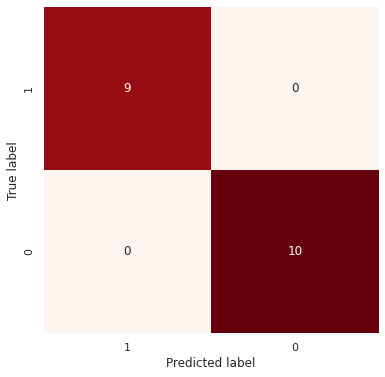

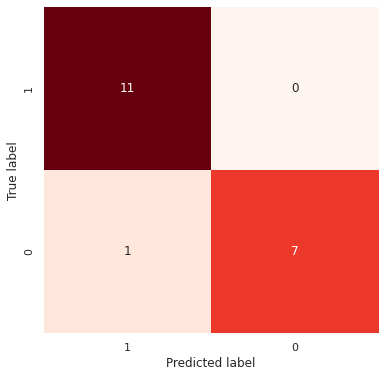

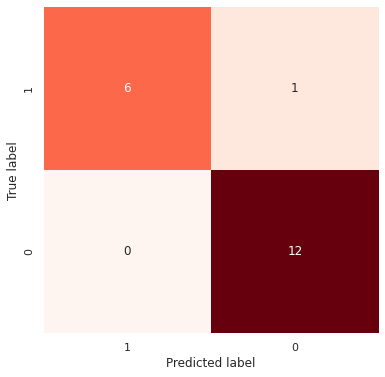

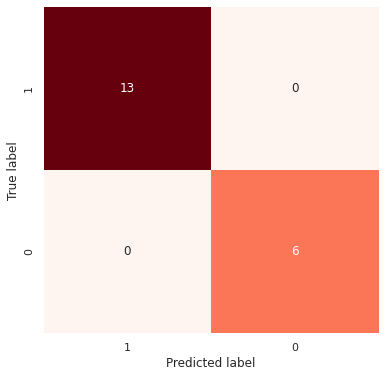

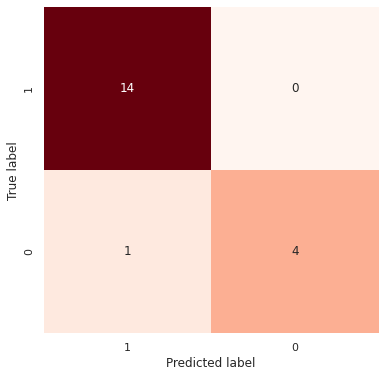

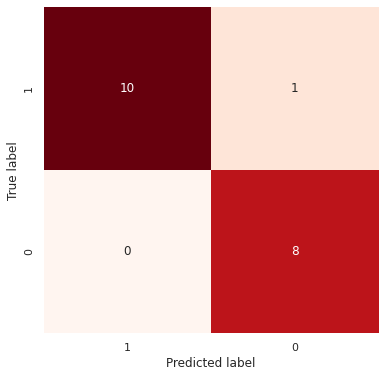

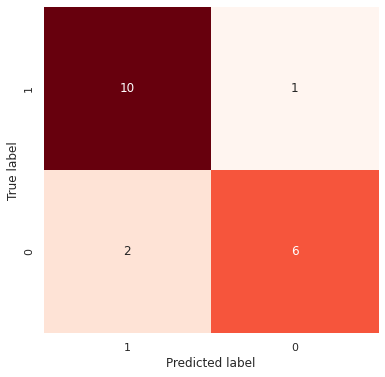

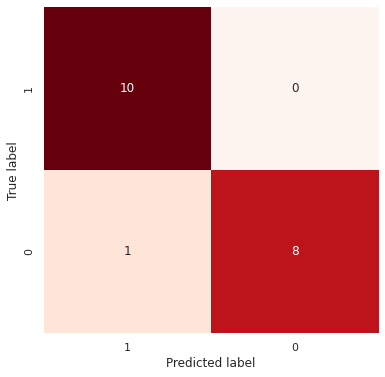

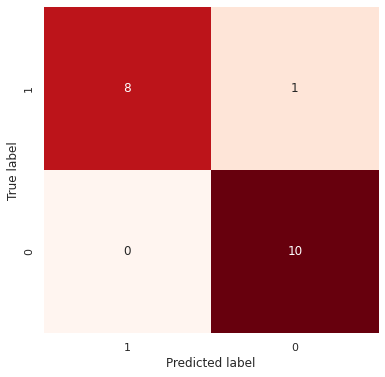

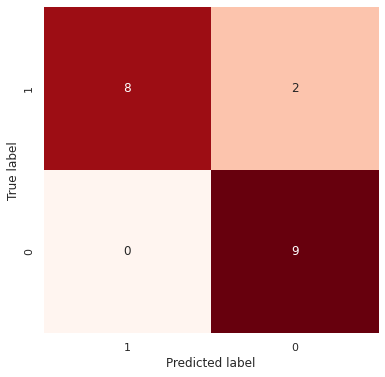

Accuracy per Iteration:  [1.0, 0.9473684210526315, 0.9473684210526315, 1.0, 0.9473684210526315, 0.9473684210526315, 0.8421052631578947, 0.9473684210526315, 0.9473684210526315, 0.8947368421052632]
Average K-Fold Accuracy : 0.9421052631578947


AUC per Iteration:  [1.0, 0.9375, 0.9285714285714286, 1.0, 0.9, 0.9545454545454545, 0.8295454545454545, 0.9444444444444444, 0.9444444444444444, 0.9]
Average K-Fold AUC : 0.9339051226551227


In [12]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import seaborn as sns


kf = KFold(n_splits = 10, shuffle = True)
rfc = RandomForestClassifier(n_jobs=-1,
                             bootstrap= True,max_depth = 30,
                             max_features= 'sqrt',
                             min_samples_leaf= 1,min_samples_split= 10,n_estimators= 200)

scores = []
auc = []
for i in range(10):
  result = next(kf.split(X,Y))
  train_X = X[result[0]]
  train_Y = Y[result[0]]
  test_X = X[result[1]]
  test_Y = Y[result[1]]
  model = rfc.fit(train_X,train_Y)
  predictions = model.predict(test_X)
  scores.append(model.score(test_X,test_Y))
  roc_auc = roc_auc_score(test_Y,predictions)
  auc.append(roc_auc)

  sns.set(rc={'figure.figsize':(6,6)})
  cm = confusion_matrix(test_Y,predictions)
  sns.heatmap(cm,annot=True,fmt='d',cmap='Reds',cbar = False,yticklabels=[1,0],xticklabels=[1,0])
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  
print('Accuracy per Iteration: ', scores)
print('Average K-Fold Accuracy :' , np.mean(scores))

print('\n')

print('AUC per Iteration: ', auc)
print('Average K-Fold AUC :' , np.mean(auc))

# XGBoost

In [0]:
import xgboost as xgb
xg = xgb.XGBClassifier(max_depth = 2,n_estimators = 200,n_jobs = -1,learning_rate= 0.05,
         subsample= 0.8,
         colsample_bytree=1,
         gamma=1)

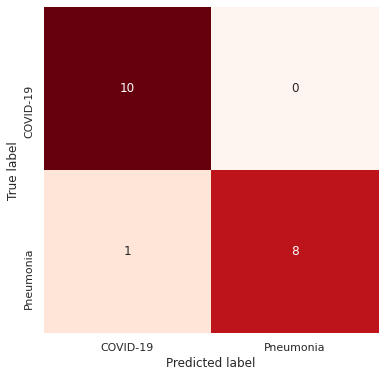

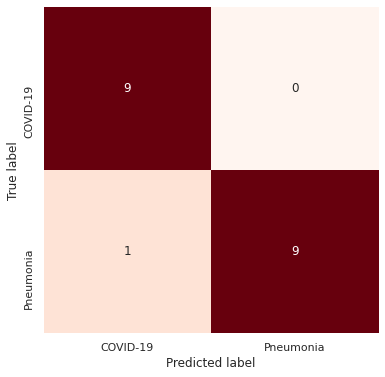

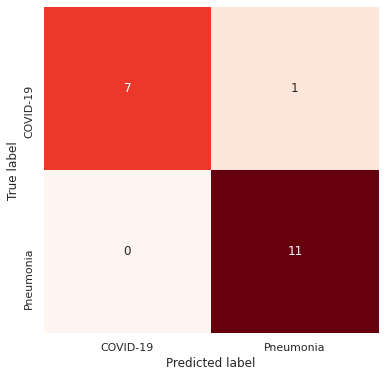

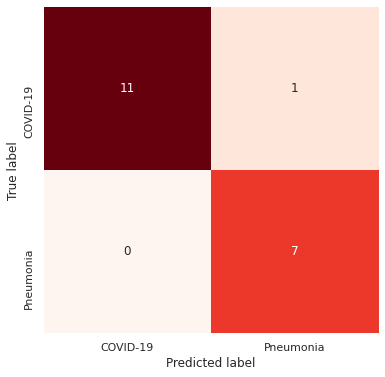

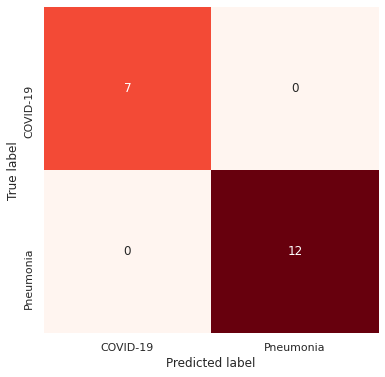

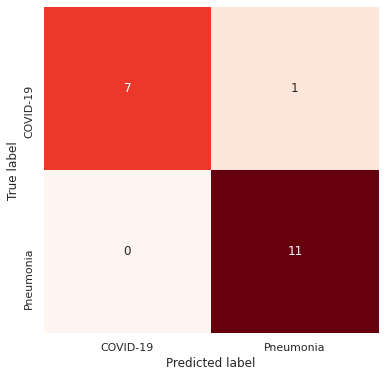

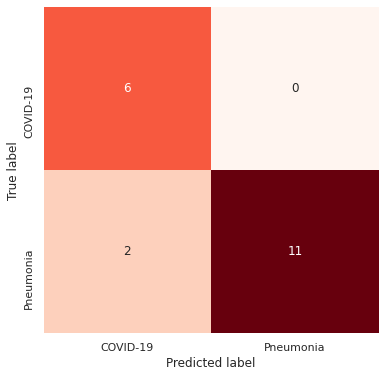

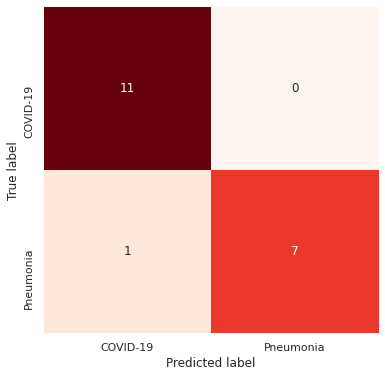

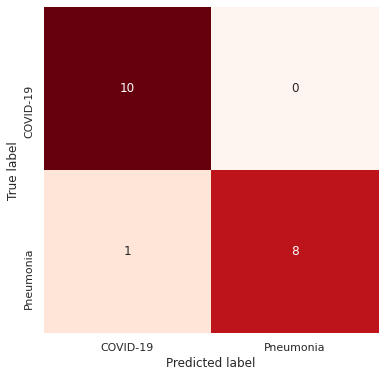

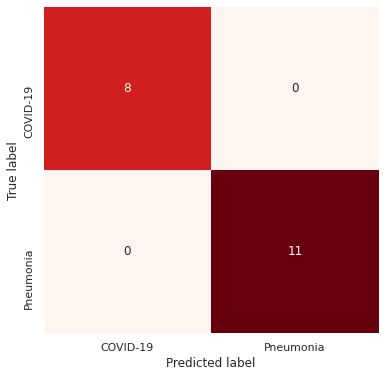

Accuracy per Iteration:  [0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 1.0, 0.9473684210526315, 0.8947368421052632, 0.9473684210526315, 0.9473684210526315, 1.0]
Average K-Fold Accuracy : 0.9526315789473683


AUC per Iteration:  [0.9444444444444444, 0.95, 0.9375, 0.9583333333333333, 1.0, 0.9375, 0.9230769230769231, 0.9375, 0.9444444444444444, 1.0]
Average K-Fold AUC : 0.9532799145299146


In [18]:
import xgboost as xgb

xg = xgb.XGBClassifier(max_depth = 2,n_estimators = 200,n_jobs = -1,learning_rate= 0.05,
         subsample= 0.8,
         colsample_bytree=1,
         gamma=1)

scores = []
auc = []
for i in range(10):
  result = next(kf.split(X,Y))
  train_X = X[result[0]]
  train_Y = Y[result[0]]
  test_X = X[result[1]]
  test_Y = Y[result[1]]
  model = xg.fit(train_X,train_Y)
  predictions = model.predict(test_X)
  cm = confusion_matrix(test_Y,predictions)
  
  sns.set(rc={'figure.figsize':(6,6)})
  sns.heatmap(cm,annot=True,fmt='d',cmap='Reds',cbar = False,yticklabels=['COVID-19','Pneumonia'],xticklabels=['COVID-19','Pneumonia'])
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show() 
  scores.append(model.score(test_X,test_Y))
  roc_auc = roc_auc_score(test_Y,predictions)
  auc.append(roc_auc)
  
print('Accuracy per Iteration: ', scores)
print('Average K-Fold Accuracy :' , np.mean(scores))

print('\n')

print('AUC per Iteration: ', auc)
print('Average K-Fold AUC :' , np.mean(auc))